In [27]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from itertools import islice
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
from nltk import pos_tag, word_tokenize
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [28]:
awareness = ( 0.54 , 0.41 , 0.73 )
clarity = ( 2.19 , 2.01 , 2.05 )
adaptability = ( -0.31 , -0.31 , -0.23 )
relationship = ( 0.27 , 0.53 , 0.91 )
communication = ( 6.81 , 6.53 , 6.86 )
ghostwrite = ( 0.33 , 0.48 , 0.36 )
branding = ( 1.62 , 1.57 , 1.54 )
fear = ( 0.14 , -0.01 , 0.03 )
softskill = ( 2.81 , 3.61 , 3.34 )
intelligence = ( 0.28 , 0.47 , 0.83 )
action = ( -0.43 , -0.48 , -0.41 )
positivity = ( 1.38 , 1.4 , 1.42 )
alignment = ( 0.08 , 0.04 , -0.02 )
boundary = ( -0.22 , -0.15 , -0.34 )
trust = ( 0.34 , 0.35 , 0.27 )
progress = ( 4.37 , 3.78 , 3.83 )
growth = ( 1.95 , 2.39 , 2.67 )
email = ( -0.42 , -0.45 , -0.5 )
business = ( 0.45 , 0.86 , 1.19 )
write = ( 0.45 , 0.31 , 0.24 )
productivity = ( 0.57 , 0.55 , 0.33 )
hire = ( -0.51 , -0.47 , -0.49 )
team = ( -0.51 , -0.47 , -0.49 )
community = ( -0.29 , -0.29 , -0.13 )
change = ( 0.78 , 0.61 , 0.96 )
goals = ( 1.51 , 1.52 , 1.31 )
success = ( 1.96 , 2.12 , 2.71 )
development = ( 0.04 , 0.33 , 0.59 )
brand = ( -0.58 , -0.57 , -0.49 )
content = ( 3.26 , 3.05 , 1.83 )
wellbeing = ( -0.41 , -0.37 , -0.42 )
creativity = ( 0.5 , 0.28 , 0.44 )
humanbehavior = ( -0.58 , -0.56 , -0.57 )
intention = ( 0.33 , 0.18 , 0.28 )
attention = ( 0.04 , -0.01 , -0.06 )
consistency = ( -0.44 , -0.45 , -0.42 )
discipline = ( -0.44 , -0.45 , -0.42 )
wisdom = ( -0.15 , -0.08 , -0.07 )
video = ( 0.62 , 0.88 , 0.31 )
resilience = ( -0.52 , -0.55 , -0.54 )
empathy = ( 0.69 , 0.78 , 0.61 )
kindness = ( -0.02 , -0.01 , -0.16 )
hope = ( -0.52 , -0.55 , -0.54 )
optimism = ( -0.52 , -0.55 , -0.54 )
possibility = ( -0.46 , -0.5 , -0.47 )
focus = ( 0.17 , 0.1 , 0.03 )
grit = ( -0.49 , -0.46 , -0.44 )
growthmindset = ( -0.21 , -0.11 , 0.1 )
help = ( -0.45 , -0.47 , -0.51 )
vulnerability = ( -0.32 , -0.25 , -0.28 )
promise = ( -0.51 , -0.51 , -0.54 )
happyholiday = ( -0.42 , -0.21 , -0.35 )
presence = ( -0.52 , -0.44 , -0.52 )
choice = ( -0.46 , -0.48 , -0.49 )
collaboration = ( -0.31 , -0.28 , -0.36 )
curiosity = ( -0.42 , -0.42 , -0.42 )
listen = ( -0.08 , -0.09 , -0.19 )
perspective = ( 0.84 , 0.7 , 0.71 )
position = ( 0.32 , 0.32 , 0.22 )
respect = ( -0.49 , -0.46 , -0.54 )
curious = ( -0.54 , -0.54 , -0.55 )
humility = ( -0.43 , -0.43 , -0.39 )
gratitude = ( 0.32 , 0.45 , 0.4 )
competence = ( -0.49 , -0.5 , -0.51 )
confidence = ( -0.49 , -0.5 , -0.51 )
candor = ( -0.49 , -0.5 , -0.51 )
veteransday = ( -0.53 , -0.55 , -0.52 )
veteran = ( -0.53 , -0.55 , -0.52 )
uncertainty = ( -0.52 , -0.53 , -0.55 )
positive = ( -0.55 , -0.56 , -0.55 )
influence = ( -0.48 , -0.47 , -0.52 )
passion = ( -0.59 , -0.58 , -0.58 )
podcast = ( -0.42 , -0.45 , -0.44 )
post = ( -0.59 , -0.58 , -0.58 )
hindsight = ( -0.51 , -0.53 , -0.49 )
foresight = ( -0.51 , -0.53 , -0.49 )
transformation = ( -0.08 , -0.15 , 0.13 )
inspiration = ( -0.23 , -0.24 , -0.35 )
mindset = ( 1.68 , 1.79 , 2.54 )
impact = ( -0.1 , -0.16 , -0.41 )
encouragement = ( -0.46 , -0.48 , -0.54 )
perfection = ( -0.52 , -0.53 , -0.49 )
time = ( -0.4 , -0.33 , -0.48 )
visualization = ( -0.54 , -0.56 , -0.56 )
work = ( -0.12 , -0.14 , -0.14 )
burnout = ( -0.42 , -0.39 , -0.41 )
stress = ( -0.55 , -0.57 , -0.55 )
softskill = ( -0.59 , -0.59 , -0.57 )
balance = ( -0.54 , -0.56 , -0.54 )
read = ( -0.58 , -0.59 , -0.56 )
write = ( -0.58 , -0.59 , -0.56 )
fiction = ( -0.58 , -0.59 , -0.56 )
human = ( -0.56 , -0.54 , -0.57 )
advice = ( 0.5 , 0.53 , 0.09 )
idea = ( -0.52 , -0.52 , -0.55 )
purpose = ( -0.33 , -0.32 , -0.32 )
talent = ( 0.13 , 0.03 , -0.2 )
energy = ( -0.16 , -0.26 , -0.21 )
guilt = ( -0.22 , -0.31 , -0.29 )
coronavirus = ( 1.73 , 1.4 , 1.46 )
lift = ( -0.56 , -0.54 , -0.52 )
mentalhealth = ( -0.46 , -0.43 , -0.41 )
simplicity = ( -0.09 , -0.15 , -0.32 )
badass = ( -0.45 , -0.5 , -0.52 )
understand = ( -0.4 , -0.45 , -0.49 )
unity = ( -0.4 , -0.45 , -0.49 )
humanity = ( -0.45 , -0.49 , -0.54 )
brand = ( -0.41 , -0.35 , -0.41 )
constraint = ( -0.38 , -0.45 , -0.38 )
reinvention = ( -0.38 , -0.43 , -0.38 )
motivation = ( -0.43 , -0.47 , -0.49 )
reframe = ( -0.04 , -0.17 , -0.27 )
gift = ( -0.23 , -0.31 , -0.49 )
support = ( -0.53 , -0.52 , -0.49 )
innovation = ( -0.28 , -0.42 , -0.32 )
performance = ( -0.41 , -0.43 , -0.49 )
business = ( -0.52 , -0.55 , -0.52 )
reflection = ( -0.31 , -0.36 , -0.38 )
meditation = ( -0.41 , -0.45 , -0.49 )
business = ( -0.48 , -0.46 , -0.44 )
charisma = ( -0.04 , -0.12 , -0.1 )
comparison = ( -0.44 , -0.45 , -0.49 )
unstuck = ( -0.42 , -0.48 , -0.38 )
future = ( -0.42 , -0.46 , -0.42 )
hr = ( -0.53 , -0.53 , -0.54 )
experience = ( -0.53 , -0.53 , -0.54 )
advisory = ( -0.42 , -0.37 , -0.44 )
consult = ( -0.42 , -0.37 , -0.44 )
generosity = ( -0.47 , -0.5 , -0.38 )
newyear = ( -0.47 , -0.5 , -0.44 )
resolution = ( -0.45 , -0.46 , -0.44 )
appreciation = ( -0.36 , -0.38 , -0.02 )
transition = ( -0.53 , -0.53 , -0.52 )
liminality = ( -0.4 , -0.34 , -0.27 )
duality = ( -0.53 , -0.55 , -0.49 )
accountability = ( -0.4 , -0.36 , -0.38 )
travel = ( -0.59 , -0.56 , -0.49 )
culture = ( -0.51 , -0.49 , -0.49 )
vacation = ( -0.58 , -0.58 , -0.54 )
holiday = ( -0.58 , -0.58 , -0.54 )
sales = ( -0.45 , -0.42 , -0.36 )
intellgence = ( -0.56 , -0.57 , -0.52 )
service = ( -0.56 , -0.58 , -0.57 )
value = ( -0.53 , -0.55 , -0.52 )
perceptive = ( -0.53 , -0.49 , -0.44 )
communicate = ( -0.59 , -0.59 , -0.58 )
readinglist = ( -0.54 , -0.55 , -0.52 )
serve = ( -0.57 , -0.58 , -0.56 )
human = ( -0.17 , 0.07 , 0.18 )
ai = ( -0.58 , -0.58 , -0.55 )
teamwork = ( -0.56 , -0.54 , -0.5 )
open = ( -0.58 , -0.57 , -0.58 )
persuasion = ( -0.6 , -0.6 , -0.58 )
virtual = ( -0.44 , -0.45 , -0.27 )
career = ( 2.74 , 2.8 , 2.77 )
entrepreneur = ( -0.09 , -0.14 , 0.2 )
leadership = ( 2.42 , 2.55 , 2.71 )
illuminate = ( 1.46 , 1.33 , 1.15 )
linkedin = ( 1.16 , 1.38 , 1.05 )
self = ( 0.95 , 1.08 , 0.65 )
book = ( -0.35 , -0.39 , -0.28 )
connect = ( 2.75 , 2.56 , 2.59 )
manage = ( 0.77 , 0.69 , 0.61 )
story = ( 0.68 , 0.88 , 0.68 )
social = ( 2.75 , 3.03 , 2.35 )
education = ( 0.2 , -0.24 , 2.4 )
internation = ( 0.2 , -0.24 , 2.4 )
writer = ( 0.2 , -0.24 , 2.4 )
school = ( 0.2 , -0.24 , 3.2 )
education = ( 0.0 , -0.25 , 0.8 )
career = ( 0.0 , -0.25 , 0.8 )
collaboration = ( 0.0 , -0.25 , 0.8 )
college = ( 0.2 , -0.21 , 0.6 )
trauma = ( 0.2 , -0.21 , 0.6 )
children = ( 0.2 , -0.21 , 0.6 )
media = ( 10.8 , 0.49 , 50.2 )
study = ( 0.2 , -0.25 , 3.6 )
communication = ( 0.2 , -0.25 , 3.6 )
liberal = ( 0.2 , -0.25 , 3.6 )
professor = ( 0.2 , -0.25 , 3.6 )
hr = ( 7.0 , -0.23 , 33.6 )
leader = ( 7.0 , -0.23 , 33.6 )
innovation = ( 7.0 , -0.23 , 33.6 )
lobby = ( 7.0 , -0.23 , 33.6 )
content = ( 1.2 , 0.24 , 12.8 )
female = ( 1.2 , -0.07 , 9.2 )
founder = ( 1.2 , -0.02 , 9.2 )
create = ( 1.2 , -0.07 , 9.2 )
transport = ( 0.0 , -0.25 , 0.6 )
heavy = ( 0.0 , -0.25 , 0.6 )
experience = ( 0.0 , -0.25 , 0.6 )
operational = ( 0.0 , -0.25 , 0.6 )
specialist = ( 0.0 , -0.25 , 0.6 )
market = ( 83.8 , 6.82 , 461.2 )
communication = ( 1.4 , 0.09 , 14.0 )
across = ( 0.0 , -0.24 , 0.4 )
specialize = ( 0.0 , -0.24 , 0.4 )
b2b = ( 0.4 , -0.2 , 1.8 )
product = ( 0.0 , -0.02 , 10.4 )
linkedin = ( 2.6 , 0.14 , 51.8 )
technology = ( 1.4 , 0.21 , 34.0 )
management = ( 0.0 , 0.04 , 15.2 )
develop = ( 0.6 , -0.19 , 12.2 )
new = ( 19.4 , -0.16 , 115.4 )
health = ( 0.8 , 0.19 , 15.4 )
clinical = ( 0.6 , -0.19 , 12.2 )
care = ( 0.8 , -0.15 , 12.8 )
specialty = ( 0.0 , -0.25 , 0.6 )
healthcare = ( 0.4 , -0.2 , 4.8 )
technology = ( 0.0 , -0.25 , 0.6 )
top = ( 81.6 , 6.51 , 440.6 )
phd = ( 0.2 , -0.13 , 0.6 )
care = ( 0.2 , -0.21 , 0.6 )
beth = ( 0.0 , -0.24 , 20.4 )
biotech = ( 0.0 , -0.24 , 20.4 )
entrepreneur = ( 0.2 , -0.24 , 24.2 )
venture = ( 0.0 , -0.24 , 20.4 )
business = ( 82.8 , 7.06 , 457.4 )
entrepreneur = ( 0.2 , -0.24 , 3.6 )
help = ( 1.2 , -0.21 , 10.6 )
good = ( 0.0 , -0.11 , 0.2 )
life = ( 0.0 , -0.11 , 0.2 )
mosquito = ( 0.0 , -0.11 , 0.2 )
party = ( 0.0 , -0.11 , 0.2 )
want = ( 0.0 , -0.11 , 0.2 )
emotional = ( 1.0 , -0.15 , 2.0 )
intelligence = ( 1.0 , -0.15 , 2.0 )
example = ( 1.0 , -0.15 , 2.0 )
work = ( 3.8 , 0.53 , 18.0 )
write = ( 1.0 , -0.15 , 2.0 )
world = ( 0.6 , 0.12 , 4.0 )
year = ( 0.6 , 0.12 , 4.0 )
burnout = ( 0.6 , 0.12 , 4.0 )
client = ( 7.6 , -0.2 , 20.0 )
swordfish = ( 0.0 , -0.23 , 0.0 )
service = ( 0.0 , -0.23 , 0.0 )
creative = ( 2.2 , -0.25 , 9.4 )
director = ( 2.2 , -0.25 , 9.4 )
social = ( 0.4 , 0.01 , 5.2 )
gap = ( 0.0 , -0.09 , 0.2 )
operation = ( 0.0 , -0.09 , 0.2 )
name = ( 0.0 , -0.19 , 3.6 )
say = ( 1.0 , -0.21 , 7.0 )
people = ( 1.0 , -0.18 , 7.2 )
word = ( 1.0 , -0.21 , 7.0 )
thing = ( 2.8 , 0.07 , 15.6 )
best = ( 2.8 , 0.07 , 15.6 )
way = ( 2.8 , 0.07 , 15.6 )
know = ( 2.8 , 0.11 , 16.4 )
thank = ( 0.4 , -0.2 , 1.4 )
brand = ( 93.2 , 6.46 , 495.4 )
digital = ( 0.0 , 0.03 , 0.0 )
week = ( 2.2 , 0.31 , 24.2 )
executive = ( 0.2 , -0.24 , 2.8 )
track = ( 0.2 , -0.24 , 2.8 )
record = ( 0.2 , -0.24 , 2.8 )
base = ( 0.2 , -0.1 , 0.6 )
get = ( 0.0 , -0.24 , 1.4 )
author = ( 0.0 , -0.24 , 1.4 )
valley = ( 0.2 , -0.24 , 0.8 )
company = ( 12.0 , -0.21 , 54.0 )
time = ( 14.0 , -0.24 , 17.0 )
silicon = ( 0.2 , -0.24 , 0.8 )
university = ( 0.4 , -0.21 , 9.0 )
talent = ( 0.0 , -0.25 , 2.0 )
kaizen = ( 0.0 , -0.25 , 2.0 )
search = ( 0.0 , -0.25 , 2.0 )
leadership = ( 7.6 , -0.22 , 22.0 )
vikram = ( 0.0 , -0.21 , 0.2 )
like = ( 0.0 , -0.0 , 1.6 )
fintech = ( 0.0 , -0.0 , 1.6 )
series = ( 0.0 , -0.0 , 1.6 )
economy = ( 13.8 , -0.24 , 16.2 )
reporter = ( 13.8 , -0.24 , 16.2 )
bank = ( 0.0 , -0.02 , 5.4 )
india = ( 0.4 , 0.11 , 13.4 )
finance = ( 0.4 , 0.11 , 13.4 )
standard = ( 0.0 , -0.02 , 5.4 )
platform = ( 0.8 , -0.17 , 4.8 )
industry = ( 0.8 , -0.17 , 4.8 )
mobile = ( 0.8 , -0.12 , 4.8 )
design = ( 0.8 , -0.17 , 4.8 )
software = ( 2.2 , -0.16 , 36.2 )
jody = ( 0.0 , 0.05 , 0.0 )
account = ( 0.2 , 0.06 , 1.4 )
firm = ( 0.0 , 0.05 , 0.0 )
finance = ( 0.0 , 0.05 , 0.0 )
consult = ( 0.4 , -0.12 , 8.0 )
wealth = ( 0.4 , -0.12 , 8.0 )
investment = ( 0.4 , -0.12 , 8.0 )
engineer = ( 1.4 , -0.24 , 31.4 )
build = ( 1.4 , -0.24 , 31.4 )
every = ( 1.4 , -0.24 , 31.4 )
day = ( 1.4 , -0.24 , 31.4 )
role = ( 0.2 , -0.24 , 1.4 )
manager = ( 0.2 , -0.24 , 1.4 )
psychology = ( 1.0 , -0.11 , 7.0 )
acquire = ( 1.0 , -0.11 , 7.0 )
nir = ( 1.0 , -0.11 , 7.0 )
eyal = ( 1.0 , -0.11 , 7.0 )
palmer = ( 0.0 , -0.06 , 0.0 )
special = ( 0.0 , -0.06 , 0.0 )
lee = ( 1.2 , -0.24 , 23.8 )
africa = ( 1.2 , -0.24 , 23.8 )
naik = ( 1.2 , -0.24 , 23.8 )
innovator = ( 0.0 , -0.2 , 0.0 )
interview = ( 0.0 , -0.2 , 0.0 )
city = ( 5.0 , -0.23 , 66.4 )
move = ( 5.0 , -0.23 , 66.4 )
women = ( 0.4 , -0.24 , 12.4 )
citylife = ( 0.0 , -0.25 , 0.2 )
government = ( 0.0 , -0.25 , 0.2 )
juliet = ( 0.0 , -0.24 , 1.6 )
mutual = ( 0.0 , -0.24 , 1.6 )
year = ( 0.0 , -0.24 , 1.6 )
kleiner = ( 0.0 , -0.24 , 1.6 )
sogal = ( 0.4 , -0.24 , 12.2 )
magazine = ( 0.4 , -0.24 , 12.2 )
pocket = ( 0.4 , -0.24 , 12.2 )
trust = ( 6.6 , -0.23 , 4.2 )
professional = ( 6.6 , -0.23 , 4.2 )
volk = ( 6.6 , -0.23 , 4.2 )
follow = ( 6.6 , -0.23 , 4.2 )
newsletter = ( 6.6 , -0.23 , 4.2 )
personal = ( 19.2 , -0.19 , 71.8 )
podcast = ( 11.6 , -0.22 , 51.8 )
video = ( 11.6 , -0.22 , 51.8 )
ad = ( 0.8 , -0.24 , 9.0 )
expensive = ( 0.8 , -0.24 , 9.0 )
think = ( 7.6 , -0.22 , 20.0 )
Group = ( 1.0 , -0.7 , 12.0 )
School = ( 0.0 , -0.72 , 4.0 )
University = ( 0.0 , -0.72 , 4.0 )
Counsel = ( 1.0 , -0.38 , 3.0 )
University = ( 1.0 , -0.71 , 18.0 )
App = ( 35.0 , -0.62 , 168.0 )
Startup = ( 6.0 , 0.84 , 46.0 )
technology = ( 0.0 , -0.71 , 2.0 )
Read = ( 0.0 , -0.71 , 2.0 )
LinkedIn = ( 0.0 , -0.71 , 2.0 )
technology = ( 0.0 , -0.71 , 2.0 )
news = ( 0.0 , -0.71 , 2.0 )
Consulting = ( 3.0 , -0.24 , 61.0 )
Healthcare = ( 0.0 , -0.72 , 1.0 )
Biodesign = ( 0.0 , -0.71 , 3.0 )
Medical = ( 1.0 , 0.29 , 3.0 )
Partners = ( 0.0 , -0.7 , 102.0 )
Stride = ( 0.0 , 0.44 , 1.0 )
Work = ( 3.0 , 2.48 , 20.0 )
Productivity = ( 3.0 , 2.48 , 20.0 )
Media = ( 11.0 , -0.71 , 47.0 )
Apple = ( 0.0 , 0.62 , 1.0 )
Communication = ( 0.0 , -0.21 , 18.0 )
Media = ( 0.0 , 1.67 , 0.0 )
Finance = ( 1.0 , -0.69 , 4.0 )
ZDNet = ( 1.0 , -0.69 , 4.0 )
Media = ( 0.0 , -0.38 , 4.0 )
Solution = ( 0.0 , -0.71 , 10.0 )
Collective = ( 0.0 , 1.53 , 13.0 )
Ventures = ( 0.0 , 1.39 , 8.0 )
finance = ( 69.0 , -0.69 , 81.0 )
Bank = ( 0.0 , 1.22 , 27.0 )
Market = ( 4.0 , -0.04 , 24.0 )
Botkeeper = ( 0.0 , 1.83 , 0.0 )
PayPal = ( 7.0 , -0.67 , 157.0 )
Group = ( 0.0 , 0.85 , 0.0 )
TransUnion = ( 6.0 , -0.63 , 119.0 )
Capital = ( 0.0 , -0.54 , 11.0 )
City= ( 0.0 , -0.72 , 1.0 )
Bond = ( 0.0 , -0.68 , 8.0 )
SoGal = ( 2.0 , -0.69 , 61.0 )
Lenovo = ( 33.0 , -0.55 , 21.0 )
Media = ( 58.0 , -0.47 , 259.0 )
CEO = ( 11.0 , 4.06 , 155.0 )
Principal = ( 0.0 , -0.72 , 4.0 )
Instructor = ( 0.0 , -0.72 , 4.0 )
Partners = ( 1.0 , -0.38 , 3.0 )
Professor = ( 1.0 , -0.71 , 18.0 )
talent = ( 35.0 , -0.62 , 168.0 )
Marketing = ( 65.0 , 1.14 , 321.0 )
Compliance = ( 0.0 , -0.73 , 3.0 )
Writer = ( 0.0 , -0.71 , 2.0 )
Head = ( 0.0 , 1.24 , 48.0 )
Director = ( 3.0 , -0.24 , 61.0 )
Editor = ( 0.0 , -0.72 , 1.0 )
Advisor = ( 0.0 , -0.38 , 4.0 )
Director = ( 0.0 , -0.71 , 3.0 )
Biodesign = ( 0.0 , -0.71 , 3.0 )
director = ( 1.0 , 0.64 , 7.0 )
Founder = ( 2.0 , 0.86 , 6.0 )
Director = ( 0.0 , -0.7 , 102.0 )
Partner = ( 0.0 , -0.7 , 102.0 )
founder = ( 0.0 , 0.44 , 1.0 )
Author = ( 5.0 , 0.48 , 18.0 )
Founder = ( 7.0 , 2.55 , 65.0 )
Creator = ( 3.0 , 2.48 , 20.0 )
Director = ( 11.0 , -0.71 , 47.0 )
Social = ( 0.0 , 0.62 , 1.0 )
head = ( 0.0 , -0.21 , 18.0 )
Marketing = ( 5.0 , -0.45 , 35.0 )
Founder = ( 14.0 , 2.06 , 78.0 )
Brand = ( 1.0 , -0.71 , 14.0 )
Business = ( 1.0 , -0.71 , 14.0 )
Speaker = ( 0.0 , -0.7 , 7.0 )
Entrepreneur = ( 0.0 , -0.7 , 7.0 )
Investor = ( 0.0 , -0.7 , 7.0 )
journalist = ( 1.0 , -0.69 , 4.0 )
columnist = ( 1.0 , -0.69 , 4.0 )
speaker = ( 59.0 , -0.44 , 263.0 )
author = ( 1.0 , -0.69 , 4.0 )
media = ( 1.0 , -0.69 , 4.0 )
Consultant = ( 0.0 , -0.71 , 10.0 )
founder = ( 2.0 , 0.42 , 50.0 )
Communication= ( 0.0 , 1.53 , 13.0 )
Academic = ( 0.0 , -0.4 , 1.0 )
Partner = ( 0.0 , 1.39 , 8.0 )
founder = ( 0.0 , 1.39 , 8.0 )
Economy = ( 69.0 , -0.69 , 81.0 )
Editor = ( 0.0 , 1.22 , 27.0 )
Adviser = ( 0.0 , 1.22 , 27.0 )
Author = ( 0.0 , 1.83 , 0.0 )
Learner = ( 2.0 , 0.4 , 40.0 )
creator = ( 2.0 , 0.4 , 40.0 )
Technology = ( 7.0 , -0.67 , 157.0 )
consultant = ( 1.0 , -0.67 , 7.0 )
consultant = ( 5.0 , 0.44 , 35.0 )
writer = ( 58.0 , -0.1 , 259.0 )
podcaster = ( 58.0 , -0.1 , 259.0 )
investor = ( 0.0 , -0.54 , 11.0 )
candidate = ( 25.0 , -0.58 , 332.0 )
founder= ( 0.0 , -0.72 , 1.0 )
partner = ( 0.0 , -0.68 , 8.0 )
Founder= ( 2.0 , -0.69 , 61.0 )
Brand = ( 33.0 , -0.55 , 21.0 )
writer = ( 38.0 , -0.48 , 100.0 )

In [29]:
combined = [awareness ,clarity ,adaptability ,relationship ,communication ,ghostwrite ,branding ,fear ,softskill ,intelligence ,action ,
positivity ,
alignment ,
boundary ,
trust ,
progress ,
growth ,
email ,
business ,
write ,
productivity ,
hire ,
team ,
community ,
change ,
goals ,
success ,
development ,
brand ,
content ,
wellbeing ,
creativity ,
humanbehavior ,
intention ,
attention ,
consistency ,
discipline ,
wisdom ,
video ,
resilience ,
empathy ,
kindness ,
hope ,
optimism ,
possibility ,
focus ,
grit ,
growthmindset ,
help ,
vulnerability ,
promise ,
happyholiday ,
presence ,
choice ,
collaboration ,
curiosity ,
listen ,
perspective ,
position ,
respect ,
curious ,
humility ,
gratitude ,
competence ,
confidence ,
candor ,
veteransday ,
veteran ,
uncertainty ,
positive ,
influence ,
passion ,
podcast ,
post ,
hindsight ,
foresight ,
transformation ,
inspiration ,
mindset ,
impact ,
encouragement ,
perfection ,
time ,
visualization ,
work ,
burnout ,
stress ,
softskill ,
balance ,
read ,
write ,
fiction ,
human ,
advice ,
idea ,
purpose ,
talent ,
energy ,
guilt ,
coronavirus ,
lift ,
mentalhealth ,
simplicity ,
badass ,
understand ,
unity ,
humanity ,
brand ,
constraint ,
reinvention ,
motivation ,
reframe ,
gift ,
support ,
innovation ,
performance ,
business ,
reflection ,
meditation ,
business ,
charisma ,
comparison ,
unstuck ,
future ,
hr ,
experience ,
advisory ,
consult ,
generosity ,
newyear ,
resolution ,
appreciation ,
transition ,
liminality ,
duality ,
accountability ,
travel ,
culture ,
vacation ,
holiday ,
sales ,
intellgence ,
service ,
value ,
perceptive ,
communicate ,
readinglist ,
serve ,
human ,
ai ,
teamwork ,
open ,
persuasion ,
virtual ,
career ,
entrepreneur ,
leadership ,
illuminate ,
linkedin ,
self ,
book ,
connect ,
manage ,
story ,
social ,
education ,
internation ,
writer ,
school ,
education ,
career ,
collaboration ,
college ,
trauma ,
children ,
media ,
study ,
communication ,
liberal ,
professor ,
hr ,
leader ,
innovation ,
lobby ,
content ,
female ,
founder ,
create ,
transport ,
heavy ,
experience ,
operational ,
specialist ,
market ,
communication ,
across ,
specialize ,
b2b ,
product ,
linkedin ,
technology ,
management ,
develop ,
new ,
health ,
clinical ,
care ,
specialty ,
healthcare ,
technology ,
top ,
phd ,
care ,
beth ,
biotech ,
entrepreneur ,
venture ,
business ,
entrepreneur ,
help ,
good ,
life ,
mosquito ,
party ,
want ,
emotional ,
intelligence ,
example ,
work ,
write ,
world ,
year ,
burnout ,
client ,
swordfish ,
service ,
creative ,
director ,
social ,
gap ,
operation ,
name ,
say ,
people ,
word ,
thing ,
best ,
way ,
know ,
thank ,
brand ,
digital ,
week ,
executive ,
track ,
record ,
base ,
get ,
author ,
valley ,
company ,
time ,
silicon ,
university ,
talent ,
kaizen ,
search ,
leadership ,
vikram ,
like ,
fintech ,
series ,
economy ,
reporter ,
bank ,
india ,
finance ,
standard ,
platform ,
industry ,
mobile ,
design ,
software ,
jody ,
account ,
firm ,
finance ,
consult ,
wealth ,
investment ,
engineer ,
build ,
every ,
day ,
role ,
manager ,
psychology ,
acquire ,
nir ,
eyal ,
palmer ,
special ,
lee ,
africa ,
naik ,
innovator ,
interview ,
city ,
move ,
women ,
citylife ,
government ,
juliet ,
mutual ,
year ,
kleiner ,
sogal ,
magazine ,
pocket ,
trust ,
professional ,
volk ,
follow ,
newsletter ,
personal ,
podcast ,
video ,
ad ,
expensive ,
think ,
Group ,
School ,
University ,
Counsel ,
University ,
App ,
Startup ,
technology ,
Read ,
LinkedIn ,
technology ,
news ,
Consulting ,
Healthcare ,
Biodesign ,
Medical ,
Partners ,
Stride ,
Work ,
Productivity ,
Media ,
Apple ,
Communication ,
Media ,
Finance ,
ZDNet ,
Media ,
Solution ,
Collective ,
Ventures ,
finance ,
Bank ,
Market ,
Botkeeper ,
PayPal ,
Group ,
TransUnion ,
Capital ,
City,
Bond ,
SoGal ,
Lenovo ,
Media ,
CEO ,
Principal ,
Instructor ,
Partners ,
Professor ,
talent ,
Marketing ,
Compliance ,
Writer ,
Head ,
Director ,
Editor ,
Advisor ,
Director ,
Biodesign ,
director ,
Founder ,
Director ,
Partner ,
founder ,
Author ,
Founder ,
Creator ,
Director ,
Social ,
head ,
Marketing ,
Founder ,
Brand ,
Business ,
Speaker ,
Entrepreneur ,
Investor ,
journalist ,
columnist ,
speaker ,
author ,
media ,
Consultant ,
founder ,
Communication,
Academic ,
Partner ,
founder ,
Economy ,
Editor ,
Adviser ,
Author ,
Learner ,
creator ,
Technology ,
consultant ,
consultant ,
writer ,
podcaster ,
investor ,
candidate ,
founder,
partner ,
Founder,
Brand ,
writer]


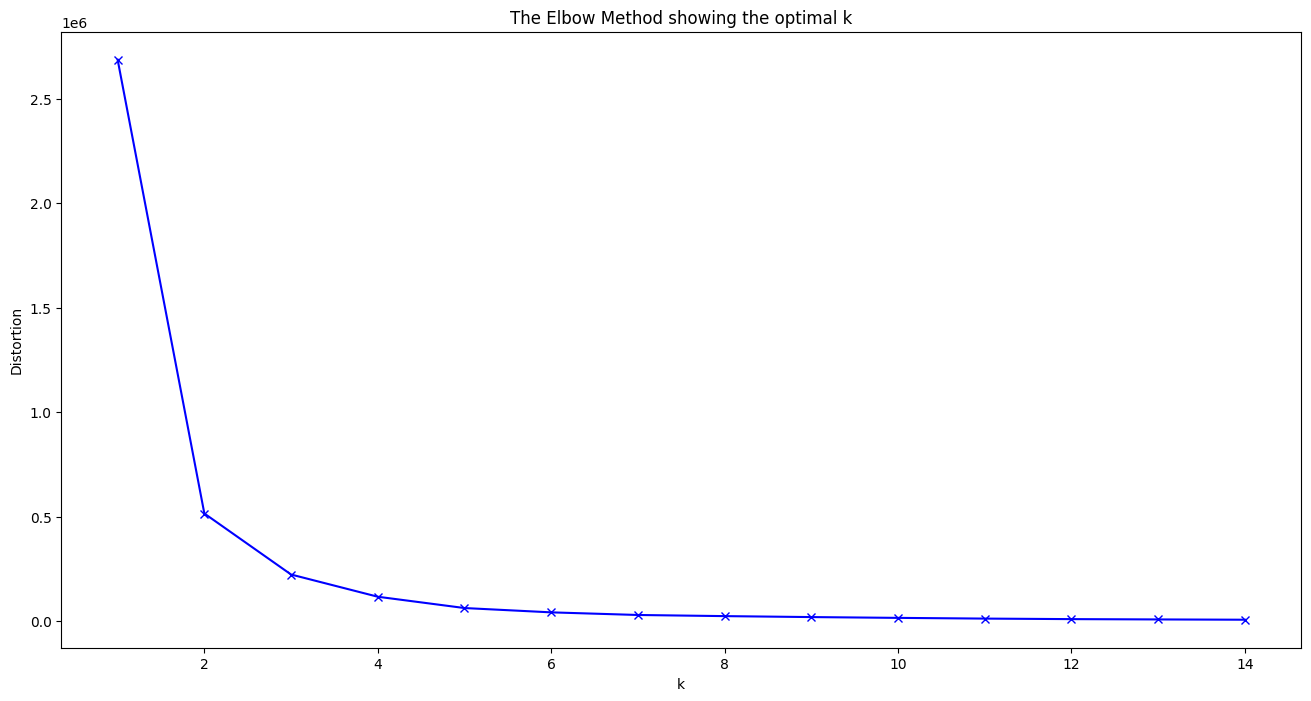

In [30]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=1)
    kmeanModel.fit(combined)
    distortions.append(kmeanModel.inertia_)
# 視覺化
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
distortions

[2687799.1773526445,
 514958.9763561608,
 222790.47495079634,
 116423.72062884622,
 62288.3552225281,
 41617.827759730455,
 29043.1239300329,
 23615.549558604325,
 19025.182754794798,
 15197.769865724336,
 11752.90008239099,
 9224.393579547848,
 7715.415266011394,
 6351.83863711576]

In [32]:
clustering_8 = KMeans(n_clusters=8,random_state=1)
clustering_8 = clustering_8.fit(combined)

In [33]:
# cluster的中心點
centers = clustering_8.cluster_centers_
centers

array([[ 4.44927536e+00,  1.13478261e-01,  2.13739130e+01],
       [ 8.62444444e+01,  6.77222222e+00,  4.68622222e+02],
       [ 2.11555556e+01, -6.11111111e-02,  1.52822222e+02],
       [ 5.81666667e+01, -4.03333333e-01,  2.59666667e+02],
       [ 2.45129032e-01, -1.55354839e-01,  1.76361290e+00],
       [ 6.65833333e+00, -2.12916667e-01,  5.40583333e+01],
       [ 5.57142857e+01, -6.00000000e-01,  8.91428571e+01],
       [ 2.50000000e+01, -5.80000000e-01,  3.32000000e+02]])

In [34]:
clustering_7 = KMeans(n_clusters=7,random_state=1)
clustering_7 = clustering_7.fit(combined)

In [35]:
clustering_6 = KMeans(n_clusters=6,random_state=1)
clustering_6 = clustering_6.fit(combined)

In [36]:
clustering_8.labels_

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 0, 4, 1, 4, 4, 1, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 4, 4, 4,
       4, 5, 4, 0, 0, 2, 0, 0, 4, 4, 4, 4, 1, 4, 4, 0, 0, 4, 0, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 4, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 5, 0, 4, 4,
       2, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 6, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       6, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,

In [37]:
clustering_7.labels_

array([0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 5, 0, 1, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0,
       0, 3, 0, 5, 5, 2, 5, 5, 0, 0, 0, 0, 1, 0, 0, 5, 5, 0, 5, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0,
       2, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 6, 0, 0, 0, 0, 0, 5, 0, 0, 0,
       6, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,

In [38]:
clustering_6.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       5, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

In [39]:
result = pd.DataFrame(combined)
result.index = ['awareness ',
'clarity ',
'adaptability ',
'relationship ',
'communication ',
'ghostwrite ',
'branding ',
'fear ',
'softskill ',
'intelligence ',
'action ',
'positivity ',
'alignment ',
'boundary ',
'trust ',
'progress ',
'growth ',
'email ',
'business ',
'write ',
'productivity ',
'hire ',
'team ',
'community ',
'change ',
'goals ',
'success ',
'development ',
'brand ',
'content ',
'wellbeing ',
'creativity ',
'humanbehavior ',
'intention ',
'attention ',
'consistency ',
'discipline ',
'wisdom ',
'video ',
'resilience ',
'empathy ',
'kindness ',
'hope ',
'optimism ',
'possibility ',
'focus ',
'grit ',
'growthmindset ',
'help ',
'vulnerability ',
'promise ',
'happyholiday ',
'presence ',
'choice ',
'collaboration ',
'curiosity ',
'listen ',
'perspective ',
'position ',
'respect ',
'curious ',
'humility ',
'gratitude ',
'competence ',
'confidence ',
'candor ',
'veteransday ',
'veteran ',
'uncertainty ',
'positive ',
'influence ',
'passion ',
'podcast ',
'post ',
'hindsight ',
'foresight ',
'transformation ',
'inspiration ',
'mindset ',
'impact ',
'encouragement ',
'perfection ',
'time ',
'visualization ',
'work ',
'burnout ',
'stress ',
'softskill ',
'balance ',
'read ',
'write ',
'fiction ',
'human ',
'advice ',
'idea ',
'purpose ',
'talent ',
'energy ',
'guilt ',
'coronavirus ',
'lift ',
'mentalhealth ',
'simplicity ',
'badass ',
'understand ',
'unity ',
'humanity ',
'brand ',
'constraint ',
'reinvention ',
'motivation ',
'reframe ',
'gift ',
'support ',
'innovation ',
'performance ',
'business ',
'reflection ',
'meditation ',
'business ',
'charisma ',
'comparison ',
'unstuck ',
'future ',
'hr ',
'experience ',
'advisory ',
'consult ',
'generosity ',
'newyear ',
'resolution ',
'appreciation ',
'transition ',
'liminality ',
'duality ',
'accountability ',
'travel ',
'culture ',
'vacation ',
'holiday ',
'sales ',
'intellgence ',
'service ',
'value ',
'perceptive ',
'communicate ',
'readinglist ',
'serve ',
'human ',
'ai ',
'teamwork ',
'open ',
'persuasion ',
'virtual ',
'career ',
'entrepreneur ',
'leadership ',
'illuminate ',
'linkedin ',
'self ',
'book ',
'connect ',
'manage ',
'story ',
'social ',
'education ',
'internation ',
'writer ',
'school ',
'education ',
'career ',
'collaboration ',
'college ',
'trauma ',
'children ',
'media ',
'study ',
'communication ',
'liberal ',
'professor ',
'hr ',
'leader ',
'innovation ',
'lobby ',
'content ',
'female ',
'founder ',
'create ',
'transport ',
'heavy ',
'experience ',
'operational ',
'specialist ',
'market ',
'communication ',
'across ',
'specialize ',
'b2b ',
'product ',
'linkedin ',
'technology ',
'management ',
'develop ',
'new ',
'health ',
'clinical ',
'care ',
'specialty ',
'healthcare ',
'technology ',
'top ',
'phd ',
'care ',
'beth ',
'biotech ',
'entrepreneur ',
'venture ',
'business ',
'entrepreneur ',
'help ',
'good ',
'life ',
'mosquito ',
'party ',
'want ',
'emotional ',
'intelligence ',
'example ',
'work ',
'write ',
'world ',
'year ',
'burnout ',
'client ',
'swordfish ',
'service ',
'creative ',
'director ',
'social ',
'gap ',
'operation ',
'name ',
'say ',
'people ',
'word ',
'thing ',
'best ',
'way ',
'know ',
'thank ',
'brand ',
'digital ',
'week ',
'executive ',
'track ',
'record ',
'base ',
'get ',
'author ',
'valley ',
'company ',
'time ',
'silicon ',
'university ',
'talent ',
'kaizen ',
'search ',
'leadership ',
'vikram ',
'like ',
'fintech ',
'series ',
'economy ',
'reporter ',
'bank ',
'india ',
'finance ',
'standard ',
'platform ',
'industry ',
'mobile ',
'design ',
'software ',
'jody ',
'account ',
'firm ',
'finance ',
'consult ',
'wealth ',
'investment ',
'engineer ',
'build ',
'every ',
'day ',
'role ',
'manager ',
'psychology ',
'acquire ',
'nir ',
'eyal ',
'palmer ',
'special ',
'lee ',
'africa ',
'naik ',
'innovator ',
'interview ',
'city ',
'move ',
'women ',
'citylife ',
'government ',
'juliet ',
'mutual ',
'year ',
'kleiner ',
'sogal ',
'magazine ',
'pocket ',
'trust ',
'professional ',
'volk ',
'follow ',
'newsletter ',
'personal ',
'podcast ',
'video ',
'ad ',
'expensive ',
'think ',
'Group ',
'School ',
'University ',
'Counsel ',
'University ',
'App ',
'Startup ',
'technology ',
'Read ',
'LinkedIn ',
'technology ',
'news ',
'Consulting ',
'Healthcare ',
'Biodesign ',
'Medical ',
'Partners ',
'Stride ',
'Work ',
'Productivity ',
'Media ',
'Apple ',
'Communication ',
'Media ',
'Finance ',
'ZDNet ',
'Media ',
'Solution ',
'Collective ',
'Ventures ',
'finance ',
'Bank ',
'Market ',
'Botkeeper ',
'PayPal ',
'Group ',
'TransUnion ',
'Capital ',
'City',
'Bond ',
'SoGal ',
'Lenovo ',
'Media ',
'CEO ',
'Principal ',
'Instructor ',
'Partners ',
'Professor ',
'talent ',
'Marketing ',
'Compliance ',
'Writer ',
'Head ',
'Director ',
'Editor ',
'Advisor ',
'Director ',
'Biodesign ',
'director ',
'Founder ',
'Director ',
'Partner ',
'founder ',
'Author ',
'Founder ',
'Creator ',
'Director ',
'Social ',
'head ',
'Marketing ',
'Founder ',
'Brand ',
'Business ',
'Speaker ',
'Entrepreneur ',
'Investor ',
'journalist ',
'columnist ',
'speaker ',
'author ',
'media ',
'Consultant ',
'founder ',
'Communication',
'Academic ',
'Partner ',
'founder ',
'Economy ',
'Editor ',
'Adviser ',
'Author ',
'Learner ',
'creator ',
'Technology ',
'consultant ',
'consultant ',
'writer ',
'podcaster ',
'investor ',
'candidate ',
'founder',
'partner ',
'Founder',
'Brand ',
'writer']  #自訂索引值
result.columns = ["comment", "reaction", "follower"]  #自訂欄位名稱
pd.set_option('display.max_columns', None)  # display all columns
pd.set_option('display.max_rows', None)  # display all rows
result

,comment,reaction,follower
awareness,0.54,0.41,0.73
clarity,2.19,2.01,2.05
adaptability,-0.31,-0.31,-0.23
relationship,0.27,0.53,0.91
communication,1.40,0.09,14.00
ghostwrite,0.33,0.48,0.36
branding,1.62,1.57,1.54
fear,0.14,-0.01,0.03
softskill,-0.59,-0.59,-0.57
intelligence,1.00,-0.15,2.00


In [40]:
# 新增 labels 為一個 column
result8 = result.assign(group=clustering_8.labels_)
#result

In [41]:
# 新增 labels 為一個 column
result7 = result.assign(group=clustering_7.labels_)
#result7

In [42]:
# 新增 labels 為一個 column
result6 = result.assign(group=clustering_6.labels_)
#result6

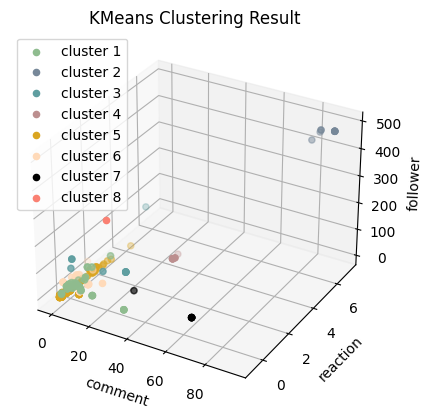

In [43]:
# 8群
colors = ['darkseagreen', 'lightslategrey', 'cadetblue', 'rosybrown', 'goldenrod', 'peachpuff', 'black','salmon']

# 繪製三維散點圖 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(8):
    ax.scatter(result8.loc[result8['group'] == i, 'comment'], result8.loc[result8['group'] == i, 'reaction'], result8.loc[result8['group'] == i, 'follower'], c=colors[i], label='cluster '+str(i+1))

ax.set_title('KMeans Clustering Result')
ax.set_xlabel('comment')
ax.set_ylabel('reaction')
ax.set_zlabel('follower')
ax.legend()
plt.show()

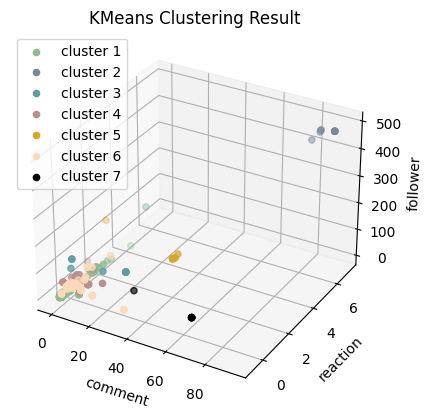

In [44]:
# 7群
colors = ['darkseagreen', 'lightslategrey', 'cadetblue', 'rosybrown', 'goldenrod', 'peachpuff', 'black']

# 繪製三維散點圖 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(7):
    ax.scatter(result7.loc[result7['group'] == i, 'comment'], result7.loc[result7['group'] == i, 'reaction'], result7.loc[result7['group'] == i, 'follower'], c=colors[i], label='cluster '+str(i+1))

ax.set_title('KMeans Clustering Result')
ax.set_xlabel('comment')
ax.set_ylabel('reaction')
ax.set_zlabel('follower')
ax.legend()
plt.show()

In [45]:
from collections import Counter

my_list = [1, 2, 3, 2, 1, 3, 3, 4, 5, 4, 6]
counted = Counter(my_list)

print(counted)


Counter({3: 3, 1: 2, 2: 2, 4: 2, 5: 1, 6: 1})


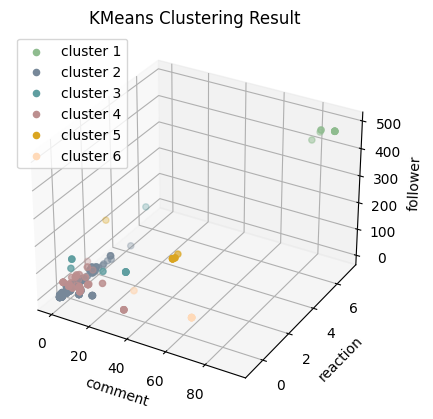

In [46]:
# 6群
colors = ['darkseagreen', 'lightslategrey', 'cadetblue', 'rosybrown', 'goldenrod', 'peachpuff', 'black']

# 繪製三維散點圖 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(6):
    ax.scatter(result6.loc[result6['group'] == i, 'comment'], result6.loc[result6['group'] == i, 'reaction'], result6.loc[result6['group'] == i, 'follower'], c=colors[i], label='cluster '+str(i+1))

ax.set_title('KMeans Clustering Result')
ax.set_xlabel('comment')
ax.set_ylabel('reaction')
ax.set_zlabel('follower')
ax.legend()
plt.show()

輪廓係數：該指標結合了簇內不相似度和簇間相似度，取值範圍為[-1, 1]。輪廓係數越接近1，表示聚類效果越好，不同簇之間的距離越大，同一簇內部數據點的距離越小


In [47]:
score8 = silhouette_score(combined, clustering_8.labels_, metric='euclidean')
score7 = silhouette_score(combined, clustering_7.labels_, metric='euclidean')
score6 = silhouette_score(combined, clustering_6.labels_, metric='euclidean')
print(score8, score7, score6)

0.727798162790504 0.7282253605614755 0.7784406754066877


SSE（誤差平方和）：這是KMeans算法內部使用的評估指標，它衡量了每個數據點到其所屬簇中心的距離的平方和。 SSE越小，表示簇內數據點越接近其所屬的簇中心，聚類效果越好

In [48]:
def calculate_sse(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse = kmeans.inertia_
    return sse
print(calculate_sse(combined, 8), calculate_sse(combined, 7), calculate_sse(combined, 6))

24452.757126223372 29053.622742359737 41617.827759730455


Calinski-Harabasz指數：該指標也是一種聚類效果的評估指標，計算簇內的離差平方和與簇間離差平方和的比值。 Calinski-Harabasz指數越大，表示聚類效果越好

In [49]:
from sklearn.metrics import calinski_harabasz_score

def calculate_ch(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    ch = calinski_harabasz_score(X, labels)
    return ch
print(calculate_ch(combined, 8), calculate_ch(combined, 7),calculate_sse(combined, 6))

6644.000543381814 6527.832503965722 41617.827759730455


結論：分7群為最佳

In [50]:
# 找出每個簇的變數是誰
variables = ['education',
'international',
'australia',
'writer',
'school',
'educational',
'career',
'collaboration',
'college',
'trauma',
'book',
'children',
'media',
'study',
'communication',
'liberal',
'professor',
'hr',
'leader',
'israeli',
'innovation',
'lobby',
'content',
'female',
'founder',
'create',
'transport',
'heavy',
'experience',
'operational',
'specialist',
'market',
'communications',
'across',
'specialize',
'b2b',
'product',
'yasi',
'linkedin',
'technology',
'management',
'develop',
'new',
'health',
'clinical',
'care',
'michelle',
'specialties',
'healthcare',
'technologydigital',
'top',
'phd',
'one',
'mesko',
'caregivers',
'beth',
'biotech',
'entrepreneurs',
'venture',
'business',
'entrepreneurship',
'help',
'good',
'life',
'mosquito',
'party',
'want',
'emotional',
'intelligence',
'examples',
'work',
'write',
'world',
'year',
'burnout',
'clients',
'swordfish',
'service',
'creative',
'director',
'vox',
'tai',
'social',
'gap',
'operations',
'mckinsey',
'name',
'say',
'people',
'word',
'things',
'best',
'way',
'know',
'many',
'thank',
'brand',
'digital',
'week',
'executive',
'track',
'record',
'base',
'london',
'get',
'gillian',
'zoe',
'segal',
'author',
'valley',
'company',
'time',
'silicon',
'kiara',
'university',
'virginia',
'talent',
'kaizen',
'search',
'leadership',
'also',
'vikram',
'mgv',
'would',
'like',
'fintech',
'series',
'economics',
'reporter',
'bank',
'india',
'finance',
'standard',
'platform',
'industry',
'mobile',
'design',
'software',
'jody',
'account',
'firm',
'financial',
'consult',
'wealth',
'investment',
'engineer',
'build',
'every',
'day',
'role',
'manager',
'psychology',
'acquire',
'nir',
'eyal',
'palmer',
'special',
'lee',
'africa',
'naik',
'innovators',
'interview',
'city',
'move',
'women',
'lisa',
'citylife',
'government',
'juliet',
'mutual',
'years',
'kleiner',
'sogal',
'magazine',
'pocket',
'forbes',
'trust',
'professionals',
'volks',
'follow',
'newsletter',
'personal',
'podcast',
'video',
'ads',
'expensive',
'think',
'IWSI_Group',
'Douglass_Elementary_School',
'Regis_University',
'Senior_Counsel',
'New_York_University',
'AppsFlyer',
'Startups',
'STRATISIoT',
'ReadWrite',
'HuffPost',
'LinkedIn',
'IoTForAll',
'ThriveGlobal',
'BBNTimes',
'Teladoc',
'FTI_Consulting',
'Healthcare_Global',"Stanford_Byers_Center_for_Biodesign" ,
"The_Medical_Futurist_Institute" ,
"alska" ,
"Westlake_Village_BioPartners" ,
"Kleiner_Perkins" ,
"Stride" ,
"EQ_Applied" ,
"Working_Simply_Inc" ,
"Productivity_Style_Assessment" ,
"Vox_Media_Inc" ,
"Apple" ,
"Reputation_Communications" ,
"all",
"Zen_Media" ,
"Influenza" ,
"Financial_Times" ,
"ZDNet" ,
"Kellye_Media" ,
"Kaizen_Talent_Solutions" ,
"Emerson_Collective" ,
"MiddleGame_Ventures" ,
"The_New_York_Times" ,
"Jana_Small_Finance_Bank" ,
"Market_Platform_Dynamics" ,
"Botkeeper" ,
"Venmo_and_PayPal" ,
"The_Palmer_Group" ,
"TransUnion_Africa" ,
"Race_Capital" ,
"APPCityLife_Inc" ,
"Bond" ,
"SoGal" ,
"Lenovo" ,
"Greatness_Media" ,
"B2Linked_com" ,
"ceo",
"Principal" ,
"Faculty_Instructor" ,
"Finn_Partners" ,
"Professor" ,
"talent_sourcer" ,
"Marketing" ,
"Compliance_Training_Officer" ,
"Writer" ,
"Head" ,
"Senior_Managing_Director" ,
"Senior_Editor" ,
"Advisor" ,
"Assistant_Director" ,
"Biodesign" ,
"director" ,
"Founder_CEO" ,
"Managing_Director" ,
"General_Partner" ,
"Co_founder_and_Partner" ,
"Author" ,
"Founder" ,
"Creator" ,
"Creative_Director" ,
"Social_Impact_Leader" ,
"head" ,
"Marketing_Strategist" ,
"Co_Founder" ,
"Brand" ,
"Business" ,
"Professional_Speaker" ,
"Entrepreneur" ,
"Investor" ,
"journalist" ,
"columnist" ,
"speaker" ,
"author" ,
"media_entrepreneur" ,
"Executive_Search_Consultant" ,
"founder" ,
"Communications_Consultant" ,
"Academic" ,
"Managing_Partner" ,
"co_founder" ,
"Economics_correspondent" ,
"Consulting_Editor" ,
"Business_Standard_Senior_Adviser" ,
"Co_Author" ,
"Learner" ,
"content_creator" ,
"Chief_Technology_Officer" ,
"consultant" ,
"public_speaker_consultant" ,
"writer" ,
"podcaster" ,
"venture_investor" ,
"candidate" ,
"founder_and_CEO" ,
"general_partner" ,
"Co_Founder_Managing_Partner" ,
"Brand_Ambassador" ,
"social_media_writer" ,
"awareness" ,
"clarity" ,
"adaptability" ,
"relationships" ,
"communication" ,
"ghostwrite" ,
"personalbranding" ,
"fear" ,
"softskills" ,
"emotionalintelligence" ,
"action" ,
"positivity" ,
"alignment" ,
"boundaries" ,
"trust" ,
"progress" ,
"growth" ,
"email" ,
"business" ,
"write" ,
"productivity" ,
"hire" ,
"team" ,
"community" ,
"change" ,
"goals" ,
"success" ,
"professionaldevelopment" ,
"buildingyourbrand" ,
"content" ,
"wellbeing","creativity",
"humanbehavior",
"intention",
"attention",
"consistency",
"discipline",
"wisdom",
"video",
"resilience",
"empathy",
"kindness",
"hope",
"optimism",
"possibilities",
"focus",
"grit",
"growthmindset",
"help",
"vulnerability",
"promise",
"happyholidays",
"presence",
"choice",
"collaboration",
"curiosity",
"listen",
"perspective",
"position",
"respect",
"curious",
"intellectualhumility",
"gratitude",
"competence",
"confidence",
"candor",
"veteransday",
"veterans",
"uncertainty",
"positive",
"influence",
"passiontoprofession",
"podcast",
"post",
"hindsight",
"foresight",
"transformation",
"inspiration",
"mindset",
"impact",
"encouragement",
"perfection",
"time",
"visualization",
"workingfromhome",
"burnout",
"stress",
"softskill",
"balance",
"read",
"writingcommunity",
"fiction",
"human",
"bestadvice",
"ideas",
"purpose",
"talent",
"personaldevelopment",
"energy",
"guilt",
"coronavirus",
"thedailylift",
"mentalhealth",
"simplicity",
"badass",
"understand",
"unity",
"thisiswhoiam",
"humanity",
"forbes",
"brand",
"constraints",
"reinvention",
"motivation",
"reframing",
"gift",
"supportthearts",
"innovation",
"performance",
"keepsmallstrong",
"whatsgoodwednesday",
"aprilfoolsday",
"smallbusiness",
"reflection",
"meditation",
"stpatricksday",
"womeninbusiness",
"beseenbeheardbehealthyberich",
"charisma",
"comparison",
"unstuck",
"futureofwork",
"hr",
"employeeexperience",
"dancefordownunder",
"advisory",
"consult",
"generosity",
"newyear",
"resolutions",
"appreciation",
"transition",
"liminality",
"duality",
"accountability",
"travel",
"culture",
"vacation",
"holiday",
"sales",
"emotionalintellgence",
"service",
"value",
"perceptive",
"communicate",
"readinglist",
"serve",
"humansfirst",
"ai",
"teamwork",
"open",
"persuasion",
"nolongervirtual",
"career",
"entrepreneur",
"leadership",
"illuminate",
"linkedin",
"book",
"connect",
"manage",
"story",
"social"]
index = []
for i in range(7):
    index.append((result7[result7['group'] == i]).index)
index

[Index(['awareness ', 'clarity ', 'adaptability ', 'relationship ',
        'ghostwrite ', 'branding ', 'fear ', 'softskill ', 'intelligence ',
        'action ',
        ...
        'media ', 'Consultant ', 'founder ', 'Academic ', 'Partner ',
        'founder ', 'Author ', 'investor ', 'founder', 'partner '],
       dtype='object', length=310),
 Index(['business ', 'brand ', 'brand ', 'business ', 'business ', 'market ',
        'top ', 'business ', 'brand '],
       dtype='object'),
 Index(['talent ', 'new ', 'talent ', 'App ', 'PayPal ', 'TransUnion ', 'CEO ',
        'talent ', 'Technology '],
       dtype='object'),
 Index(['video ', 'podcast ', 'linkedin ', 'linkedin ', 'company ', 'city ',
        'move ', 'personal ', 'podcast ', 'video ', 'Startup ', 'Consulting ',
        'SoGal ', 'Head ', 'Director ', 'Director ', 'Founder ', 'Director ',
        'Founder ', 'Director ', 'Founder ', 'Learner ', 'creator ', 'Founder'],
       dtype='object'),
 Index(['Media ', 'Media ', 'Me

In [51]:
import numpy as np
import spacy
from collections import Counter

# 讀取en_core_web_md模型
nlp = spacy.load("en_core_web_md")

# 建立分類標籤和對應的向量
labels = [
'Textile',
'Chemical',
'Food',
'Pharmaceutical',
'Electronics',
'Machinery',
'Automotive',
'Agriculture',
'Crop',
'Livestock',
'Fishing and aquaculture',
'Forestry and logging',
'Technology',
'Software',
'Information technology services',
'Internet services and applications',
'Telecommunications',
'Computer hardware',
'Semiconductors','electronics',
'Finance',
'Banking and credit',
'Investment banking and securities',
'Insurance',
'Asset management and investment',
'Payment and financial processing services',
'Retail',
'Brick-and-mortar retail stores',
'Online retail and e-commerce',
'Wholesale and distribution',
'Consumer goods manufacturing',
'Health care',
'Hospitals and clinics',
'Health care services and products',
'Medical equipment manufacturing',
'Biotechnology and pharmaceuticals',
'Health insurance',
'Energy and utilities',
'Oil and gas exploration and production',
'Renewable energy',
'Electric power generation and distribution',
'Water and waste management',
'Construction',
'Residential construction',
'Commercial and institutional construction',
'Infrastructure and civil engineering',
'Heavy construction and contracting',
'Transportation and logistics',
'Air transportation',
'Ground transportation',
'Shipping and freight',
'Warehousing and distribution',
'Media and entertainment',
'Film and television production and distribution',
'Music production and distribution',
'Publishing and journalism',
'Advertising and marketing','education','consulting']

industry = [nlp(label).vector for label in labels]

# 定義cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# 將每個單字分類至所屬的產業別
group_industries = []
for j in range(7):
    industries = []
    for word in index[j]:
        word_vector = nlp(word).vector
        similarities = [cosine_similarity(word_vector, i) for i in industry]
        max_index = np.argmax(similarities)
        category = labels[max_index]
        industries.append(category)
    group_industries.append(industries)

# 計算每個j裡產業數量最多的產業和數量
for j in range(7):
    industries_count = Counter(group_industries[j])
    most_common_industry, count = industries_count.most_common(1)[0]
    print(f"Group {j}: {most_common_industry} ({count})")


C:\Users\cindy\AppData\Local\Temp\ipykernel_6548\3253891616.py:71: RuntimeWarning: invalid value encountered in float_scalars
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


Group 0: Payment and financial processing services (27)
Group 1: Investment banking and securities (4)
Group 2: Advertising and marketing (4)
Group 3: Finance (5)
Group 4: Media and entertainment (5)
Group 5: Advertising and marketing (6)
Group 6: Publishing and journalism (3)
